# Second Model: Artificial Neural Network (ANN)

## Fetch Processed Data

In [ ]:
!git clone https://github.com/mickjeon/amazon_sales_prediction.git

Cloning into 'amazon_sales_prediction'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 68 (delta 17), reused 49 (delta 7), pack-reused 0
Receiving objects: 100% (68/68), 8.67 MiB | 14.29 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('amazon_sales_prediction/data.csv')
data.head()

,sub_category,ratings,no_of_ratings,discount_price_usd,actual_price_usd,discount_rate,agg_rating
0,0,4.1,2092.0,4.590915,7.205687,36.287625,8577.2
1,1,4.4,7943.0,132.534040,240.872394,44.977489,34949.2
2,0,3.8,229.0,2.482227,12.049645,79.400000,870.2
3,0,3.7,33.0,2.156886,18.062417,88.058706,122.1
4,2,3.6,37.0,0.409688,0.590433,30.612245,133.2


## Artificial Neural Network

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

y = data['ratings']
X = data.drop('ratings', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2500, 6)
(278, 6)
(2500,)
(278,)


In [ ]:
model = Sequential()

model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile( loss='mse', metrics=['mean_absolute_error'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 4, epochs = 100, verbose = 1, validation_split=0.1)

Epoch 1/100
563/563 [==============================] - 2s 2ms/step - loss: 60608.4922 - mean_absolute_error: 56.8801 - val_loss: 1229.0452 - val_mean_absolute_error: 11.9075
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 33088.3867 - mean_absolute_error: 45.6769 - val_loss: 972.5142 - val_mean_absolute_error: 9.9685
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 29624.5645 - mean_absolute_error: 41.4629 - val_loss: 19676.4805 - val_mean_absolute_error: 44.2757
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 21269.5469 - mean_absolute_error: 31.6179 - val_loss: 45636.8242 - val_mean_absolute_error: 65.0395
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 5344.5430 - mean_absolute_error: 19.6677 - val_loss: 202.6161 - val_mean_absolute_error: 4.4406
Epoch 6/100
563/563 [==============================] - 1s 2ms/step - loss: 5595.2466 - mean_absolute_error: 13.0428 - val_loss: 313.7

In [ ]:
y_pred = model.predict(X_test)

9/9 [==============================] - 0s 3ms/step


In [ ]:
y_test.to_numpy()
y_test_2d = y_test[:,np.newaxis]
direct_comparison = np.concatenate((y_pred, y_test_2d), axis=1)
direct_comparison

<ipython-input-9-fbbb55cda350>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_test_2d = y_test[:,np.newaxis]


array([[3.88055897, 3.9       ],
       [4.04034472, 4.1       ],
       [4.04034472, 4.        ],
       [4.04034472, 4.2       ],
       [4.04034472, 4.1       ],
       [3.6527319 , 3.7       ],
       [4.04034472, 4.1       ],
       [4.04034472, 3.7       ],
       [4.04034472, 4.5       ],
       [3.60424232, 3.6       ],
       [4.04034472, 4.1       ],
       [4.04034472, 4.        ],
       [4.04034472, 4.4       ],
       [4.04034472, 4.3       ],
       [4.04034472, 4.3       ],
       [4.04034472, 3.8       ],
       [4.04034472, 4.        ],
       [3.52082109, 3.4       ],
       [4.04034472, 4.5       ],
       [3.71769381, 3.7       ],
       [4.04034472, 4.2       ],
       [4.04034472, 4.5       ],
       [4.04034472, 4.2       ],
       [4.04034472, 4.1       ],
       [4.04034472, 4.        ],
       [4.04034472, 4.4       ],
       [4.04034472, 4.        ],
       [4.04034472, 4.        ],
       [4.04034472, 4.3       ],
       [4.04034472, 4.3       ],
       [4.

### Loss and Mean Absoulte Error plotting

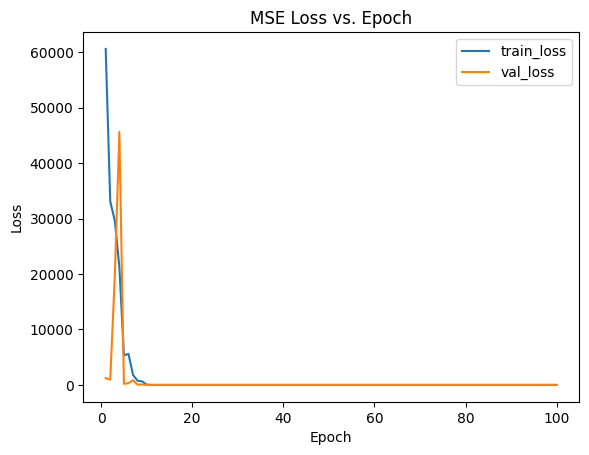

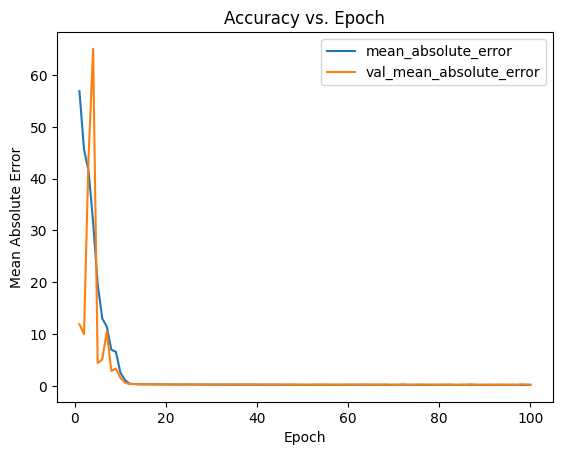

In [ ]:
epoch = np.arange(1, len(history.history['loss']) + 1)

plt.plot(epoch, history.history['loss'], label='train_loss')
plt.plot(epoch, history.history['val_loss'], label='val_loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('MSE Loss vs. Epoch')
plt.show()

plt.plot(epoch, history.history['mean_absolute_error'], label='mean_absolute_error')
plt.plot(epoch, history.history['val_mean_absolute_error'], label='val_mean_absolute_error')

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Accuracy vs. Epoch')
plt.show()

Starting from 12nd epoch

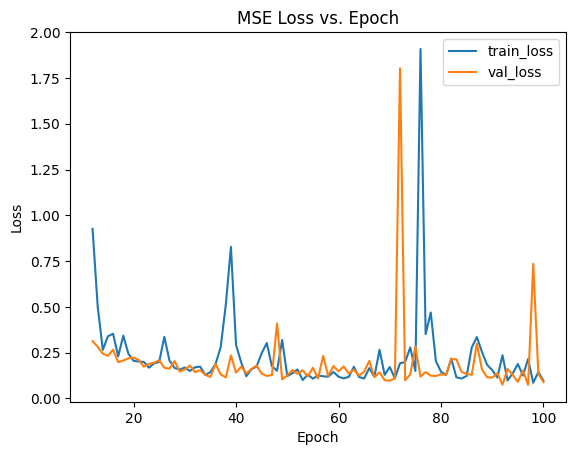

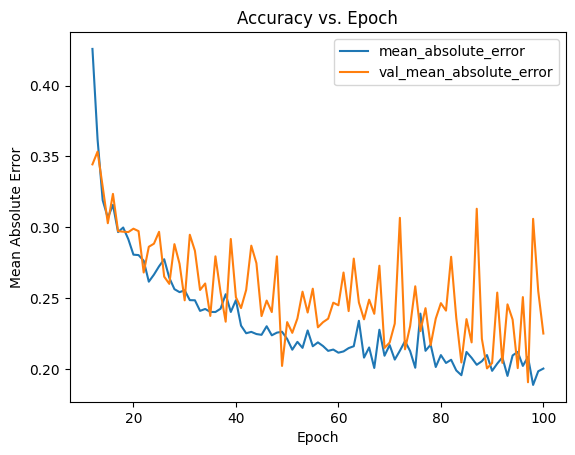

In [ ]:
epoch = np.arange(12, len(history.history['loss']) + 1)

plt.plot(epoch, history.history['loss'][11:], label='train_loss')
plt.plot(epoch, history.history['val_loss'][11:], label='val_loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('MSE Loss vs. Epoch')
plt.show()

plt.plot(epoch, history.history['mean_absolute_error'][11:], label='mean_absolute_error')
plt.plot(epoch, history.history['val_mean_absolute_error'][11:], label='val_mean_absolute_error')

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Accuracy vs. Epoch')
plt.show()